# (Ford GoBike System Data Exploration )
## by (Mohamed)

## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
bike = pd.read_csv('201902-fordgobike-tripdata.csv')
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
print(bike.shape)
print(bike.info())

(183412, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  floa

In [4]:
bike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [5]:
bike.dropna(subset=['start_station_id'],inplace= True)

In [6]:
# change 2 varibles type to datetime 

bike['start_time']= pd.to_datetime(bike['start_time'])
bike['end_time']= pd.to_datetime(bike['end_time'])

In [7]:
# make new data have the important columns
column = ['duration_sec', 'start_time','end_time','start_station_name','end_station_name','bike_id','user_type','member_birth_year','member_gender']
bike2 = bike[column]
bike2.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984.0,Male
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,The Embarcadero at Steuart St,Berry St at 4th St,2535,Customer,NaN,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989.0,Other
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974.0,Male


In [8]:
bike2['duration_min']=bike['duration_sec'] / 60
bike2.head()

<ipython-input-8-967920e94f44>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike2['duration_min']=bike['duration_sec'] / 60


,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984.0,Male,869.750000
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,The Embarcadero at Steuart St,Berry St at 4th St,2535,Customer,NaN,NaN,708.683333
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,1030.900000
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989.0,Other,608.166667
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,26.416667


In [9]:
bike2.describe()

,duration_sec,bike_id,member_birth_year,duration_min
count,183215.000000,183215.000000,174952.000000,183215.000000
mean,725.902017,4473.218792,1984.803135,12.098367
std,1795.078654,1665.249372,10.118731,29.917978
min,61.000000,11.000000,1878.000000,1.016667
25%,325.000000,3777.000000,1980.000000,5.416667
50%,514.000000,4958.000000,1987.000000,8.566667
75%,796.000000,5503.000000,1992.000000,13.266667
max,85444.000000,6645.000000,2001.000000,1424.066667


> * There is a value that does not make sense the minimum birth year is 1878 I think it could be a typo or error

### What is the structure of your dataset?

> there are 16 variable of the GoBike system with 183412 rows many variables object or float64 and some variable int, we need to convey some variables from object to date time 

### What is/are the main feature(s) of interest in your dataset?

> I am interested in discovering the most used category of bikes

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>  I think that user type, member birth year and member_gender will have effect on the usage 

## Univariate Exploration

> * I will see the variables distripution

Subscriber    163414
Customer       19801
Name: user_type, dtype: int64


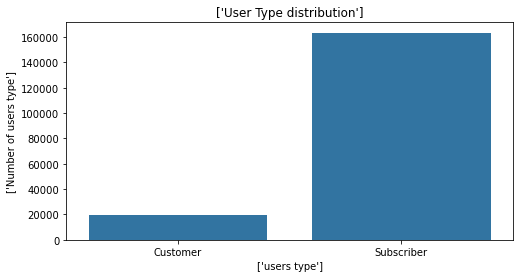

In [10]:
# see the user_type distribution
base_color = sb.color_palette()[0]
plt.figure(figsize=[8,4]);

def Bar(B,t,x,y):
    sb.countplot( x=bike2[B], color= base_color);
    
    plt.title([t]);
    plt.xlabel([x]);
    plt.ylabel([y]);
    print(bike2[B].value_counts())
    return B,t,x,y
Bar('user_type','User Type distribution','users type','Number of users type');





Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64


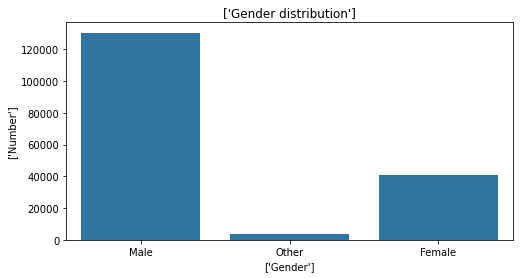

In [11]:
plt.figure(figsize=[8,4])
Bar('member_gender', 'Gender distribution','Gender', 'Number');

> * As we see that most of the bike users are subscriber more than 160000 user
> * more than 130000 of users are males

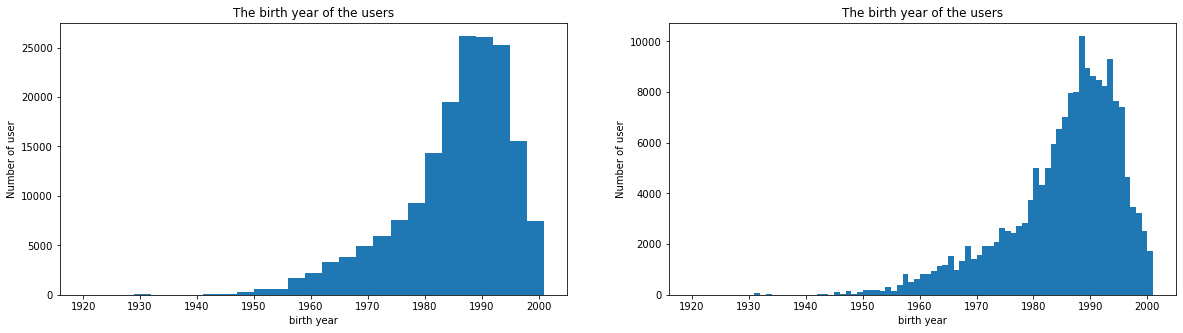

In [12]:
# the distribution of the birth year 
plt.figure(figsize=[20,5])

plt.subplot(1,2,1)
bins = np.arange(1920, bike2['member_birth_year'].max() + 3, 3)
plt.hist(data=bike2, x= 'member_birth_year', bins= bins);
plt.title('The birth year of the users');
plt.xlabel('birth year');
plt.ylabel('Number of user');

plt.subplot(1,2,2)
bins = np.arange(1920, bike2['member_birth_year'].max() + 1, 1)
plt.hist(data=bike2, x= 'member_birth_year', bins= bins);
plt.title('The birth year of the users');
plt.xlabel('birth year');
plt.ylabel('Number of user');

plt.show()

In [67]:
bike2[bike2['member_birth_year'] > 2001]

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,duration_min


> It seems that most of users birth year between 1980 and 2000 

C:\Users\Lap_Market\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


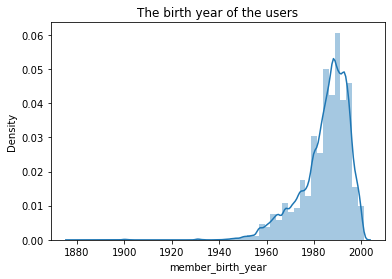

In [13]:
sb.distplot(bike2['member_birth_year']);
plt.title('The birth year of the users');

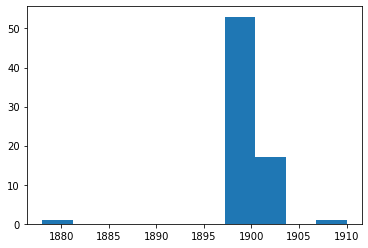

In [14]:
birth_min= bike2[bike2['member_birth_year'] < 1920]
plt.hist(birth_min['member_birth_year']);

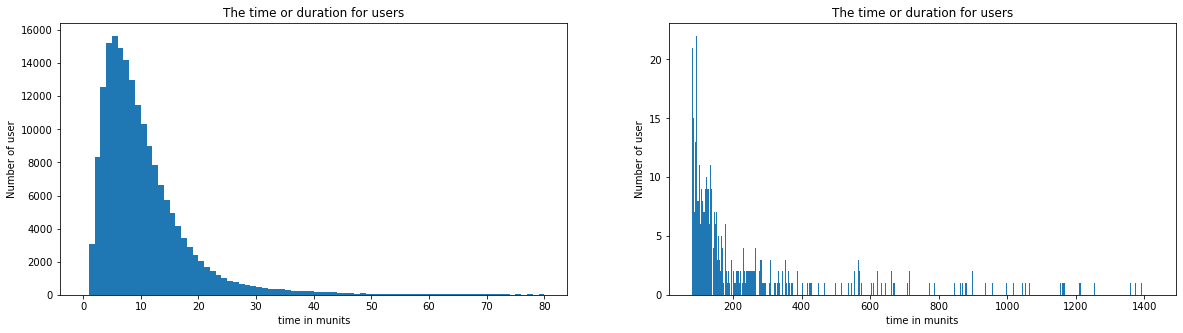

In [15]:
plt.figure(figsize= [20,5])
plt.subplot(1,2,1)
bins = np.arange(0 ,80 + 1, 1)
plt.hist(data=bike2, x= 'duration_min', bins= bins);
plt.title('The time or duration for users');
plt.xlabel('time in munits');
plt.ylabel('Number of user');

plt.subplot(1,2,2)
bins = np.arange(80 ,bike2['duration_min'].max() + 1, 1)
plt.hist(data=bike2, x= 'duration_min', bins= bins);
plt.title('The time or duration for users');
plt.xlabel('time in munits');
plt.ylabel('Number of user');


> to see the small numbers,  I made 2 plot one from 0 to 100 (the large numbers) and another one from 100 to max ( the small numbers).
we see that most duration between 0 to 20 minutes 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> No need to perform any transformation.
 the variables have a big effect on the users. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> ther are some outliers in birth year variable but I do not make any change on these outlier but I just did not take it in the visualization

## Bivariate Exploration

> In this section, I will investigate relationships between pairs of variables in the
data. 

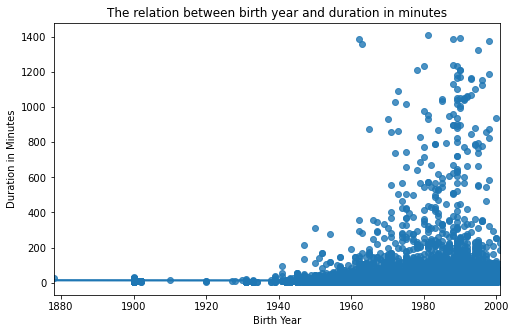

In [16]:
# this plot show the relation between the duration and year of birth

plt.figure(figsize=[8,5])
sb.regplot(data= bike2, x= 'member_birth_year' ,y= 'duration_min');
plt.title('The relation between birth year and duration in minutes');
plt.xlabel('Birth Year');
plt.ylabel('Duration in Minutes');

> It shows that there is a weak relation between the birth year and duration, I think befor the 1940 year the duration less than 200 munits and between 1940 and 1960 the duration less than 400 and after 1960 the duration range increase to become between 0 and 1400 minuts.

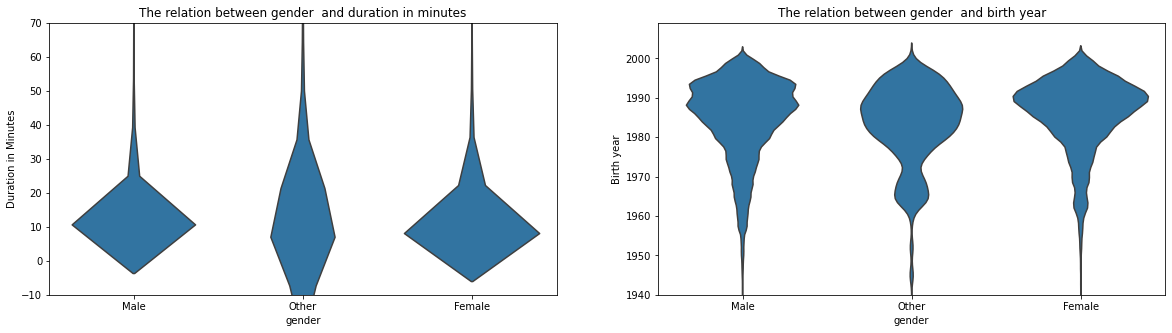

In [17]:
# the relation between gender with duration,  and gender with birth year

plt.figure(figsize=[20, 5])

plt.subplot(1,2,1)
sb.violinplot(data=bike2, x='member_gender', y='duration_min', color=base_color, inner=None);
plt.ylim([-10, 70])
plt.title('The relation between gender  and duration in minutes');
plt.xlabel('gender');
plt.ylabel('Duration in Minutes');

plt.subplot(1,2,2)
sb.violinplot(data=bike2, x='member_gender', y='member_birth_year', color=base_color, inner=None);
plt.ylim([1940, 2009])
plt.title('The relation between gender  and birth year');
plt.xlabel('gender');
plt.ylabel('Birth year');

> * At the first plot between gender and duration both male and female increase between 0 to 25 minutes especially in 10 minutes duration and after that began to gradually decrease.
> *At the second plot the popular birth year between 1985 and 2000 before 1985 the number of users start to gradually decrease.

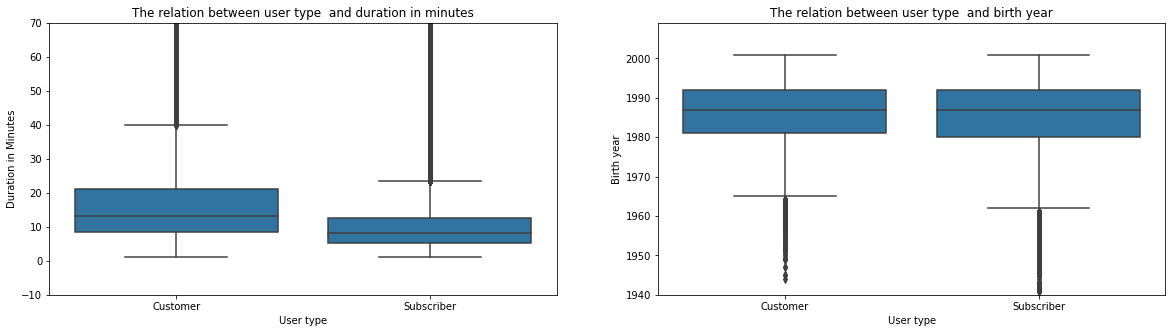

In [19]:
# the relation between user_type with duration,  and user_type with birth year

plt.figure(figsize=[20, 5])

plt.subplot(1,2,1)
sb.boxplot(data=bike2, x='user_type', y='duration_min', color=base_color);
plt.ylim([-10, 70])
plt.title('The relation between user type  and duration in minutes');
plt.xlabel('User type');
plt.ylabel('Duration in Minutes');

plt.subplot(1,2,2)
sb.boxplot(data=bike2, x='user_type', y='member_birth_year', color=base_color);
plt.ylim([1940, 2009])
plt.title('The relation between user type  and birth year');
plt.xlabel('User type');
plt.ylabel('Birth year');

>* the first plot shows that the common duration between 0 to 40 minutes in customer and between 0 and 25 in subscriber
>* the second plot shows that both customer and subscriber common birth years are between 1967 and 2000 

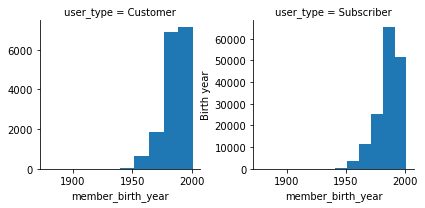

In [20]:
g = sb.FacetGrid(data = bike2, col = 'user_type',sharey=False);
g.map(plt.hist, "member_birth_year");

plt.ylabel('Birth year');

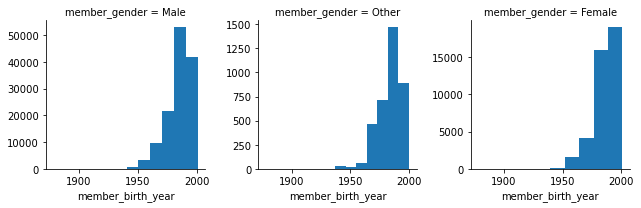

In [21]:

g = sb.FacetGrid(data = bike2, col = 'member_gender',sharey=False);
g.map(plt.hist, "member_birth_year");
plt.show()

The subscriber male percentage to males : 0.9119310344827586
The subscriber female percentage to females : 0.8867050606543315


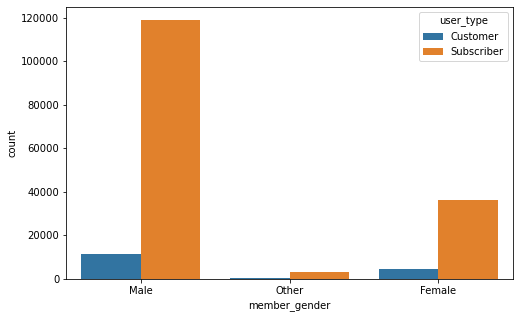

In [22]:
# the relation betweem Gender and user type
plt.figure(figsize=[8,5])
sb.countplot(data = bike2, x = 'member_gender', hue = 'user_type');

sub_male_percentage= bike2.query("member_gender == 'Male' and user_type == 'Subscriber'").count()[0]/bike[bike2['member_gender'] == 'Male'].shape[0]
sub_female_percentage= bike2.query("member_gender == 'Female' and user_type == 'Subscriber'").count()[0]/bike[bike2['member_gender'] == 'Female'].shape[0]

print('The subscriber male percentage to males :',sub_male_percentage)
print('The subscriber female percentage to females :',sub_female_percentage)

>* as we see in this plot that the percentage of males that subscrib is 91.2% and females percentage is 88.7% 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> * there is a weak relation between the birth year and duration, I think befor the 1940 year the duration less than 200 munits and between 1940 and 1960 the duration less than 400 and after 1960 the duration range increase to become between 0 and 1400 minuts.
> * between gender and duration both male and female increase between 0 to 25 minutes especially in 10 minutes duration and after that began to gradually decrease
> * between gender and birth year the popular birth year between 1985 and 2000 before 1985 the number of users start to gradually decrease.
> * the common duration of the subscriber is between  0 and 25 minutes while the common duration of the customer is between 0 and 40 minutes.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> 91 % of the males are subscriber and 88 % of the females are subscriber,  the males more than females in subscribe.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

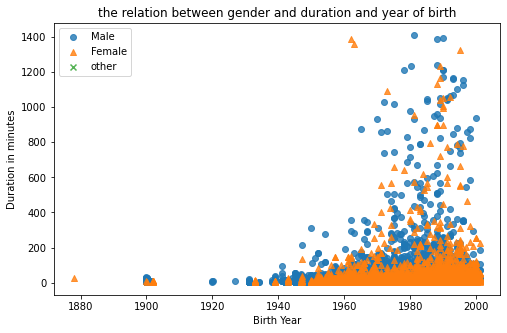

In [35]:
# the relation between gender and duration and year of birth
plt.figure(figsize=[8,5])
gen_marker=[['Male','o'], ['Female', '^'],['other','x']]
for gen, marker in gen_marker:
    plot_data= bike2.loc[bike2['member_gender']== gen]
    sb.regplot(data=plot_data, x='member_birth_year', y= 'duration_min',fit_reg= False, x_jitter=.04,  marker= marker);
plt.title('the relation between gender and duration and year of birth');
plt.xlabel('Birth Year');
plt.ylabel('Duration in minutes');
plt.legend(['Male', 'Female', 'other']);

> I think according to the above plot that both male and female have small differences in duration and birth year, but in general, we do not need to talk about these small differences.

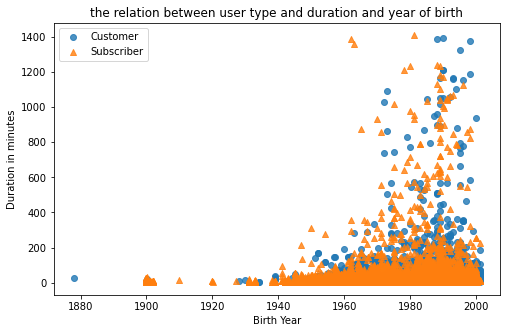

In [60]:
# the relation between user type and duration and year of birth
plt.figure(figsize=[8,5])
typ_marker=[['Customer','o'], ['Subscriber', '^']]
for typ, marker in typ_marker:
    plot_data= bike2.loc[bike2['user_type']== typ]
    sb.regplot(data=plot_data, x='member_birth_year', y= 'duration_min',fit_reg= False, x_jitter=.04,  marker= marker);
plt.title('the relation between user type and duration and year of birth');
plt.xlabel('Birth Year');
plt.ylabel('Duration in minutes');
plt.legend(['Customer', 'Subscriber']);

> I think according to the above plot that both customer and subscriber have small differences in duration and birth year, but in general, we do not need to talk about these small differences.

In [58]:
bike2.head(5)

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984.0,Male,869.750000
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,The Embarcadero at Steuart St,Berry St at 4th St,2535,Customer,NaN,NaN,708.683333
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,1030.900000
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989.0,Other,608.166667
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,26.416667


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I think according to the above plots that user type and gender both of them have small differences in duration and birth year, but in general, we do not need to talk about these small differences.

### Were there any interesting or surprising interactions between features?

> there is no surprising interactions between features